## Data Cleaning:

In [1]:
# Check the dataset shape and missing values:
import pandas as pd
df=pd.read_csv("/content/orders (1).csv")
df.head(10)

,customer_id,country,product_id,quantity,unit_price,order_date
0,202,Norway,5009,4,158.56,2024-07-26
1,279,Norway,5002,3,43.14,2024-08-25
2,192,Sweden,5009,3,231.79,2024-04-02
3,114,Sweden,5001,5,206.88,2024-06-21
4,206,Finland,5011,2,234.17,2024-03-19
5,171,Norway,5003,3,285.92,2024-04-19
6,288,Sweden,5020,5,235.18,2024-08-04
7,120,Norway,5004,4,187.29,2024-12-23
8,202,Sweden,5018,5,258.62,2024-04-15
9,221,Finland,5006,3,205.24,2024-02-16


In [2]:
df.shape

(1000, 6)

In [3]:
# Missing values:
df.isnull().sum()

,0
customer_id,0
country,0
product_id,0
quantity,0
unit_price,0
order_date,0


In [4]:
# Drop rows where customer id is missing:
df=df.dropna(subset=['customer_id'])

In [5]:
# Create a new column revenue=quantity*unit_price
df['revenue']=df['quantity']*df['unit_price']
df

,customer_id,country,product_id,quantity,unit_price,order_date,revenue
0,202,Norway,5009,4,158.56,2024-07-26,634.24
1,279,Norway,5002,3,43.14,2024-08-25,129.42
2,192,Sweden,5009,3,231.79,2024-04-02,695.37
3,114,Sweden,5001,5,206.88,2024-06-21,1034.40
4,206,Finland,5011,2,234.17,2024-03-19,468.34
...,...,...,...,...,...,...,...
995,210,Sweden,5007,1,145.35,2024-01-25,145.35
996,210,Sweden,5008,5,32.25,2024-09-22,161.25
997,133,Sweden,5005,5,58.16,2024-04-27,290.80
998,210,Sweden,5017,5,27.72,2024-05-23,138.60


In [6]:
# Check duplicates and remove them:
duplicates=df.duplicated().sum()
print("Number of duplicate rows:",duplicates)

Number of duplicate rows: 0


In [7]:
df=df.drop_duplicates()

In [8]:
# Top 5 customers by total revenue:
top_customers=df.groupby('customer_id')['revenue'].sum().sort_values(ascending=False).head(5)
print("Top 5 customers by total revenue",top_customers)

Top 5 customers by total revenue customer_id
189    7054.95
289    6219.56
198    5966.41
153    5593.88
150    5337.90
Name: revenue, dtype: float64


In [9]:
# Average revenue per order by country:
average_revenue_per_order=df.groupby('country')['revenue'].mean().sort_values(ascending=False)
print("Average revenue per order by country",average_revenue_per_order)

Average revenue per order by country country
Norway     469.736585
Sweden     468.084097
Denmark    465.400396
Finland    432.964755
Name: revenue, dtype: float64


In [10]:
# Unique products sold in Sweden:
sweden_products=df[df['country']=='Sweden']['product_id'].nunique()
print("Unique products in sweden",sweden_products)

Unique products in sweden 20


In [11]:
# Convert order date to datetime and create month:
df['order_date']=pd.to_datetime(df['order_date'])
df['month']=df['order_date'].dt.to_period("M").astype(str)

In [12]:
df

,customer_id,country,product_id,quantity,unit_price,order_date,revenue,month
0,202,Norway,5009,4,158.56,2024-07-26,634.24,2024-07
1,279,Norway,5002,3,43.14,2024-08-25,129.42,2024-08
2,192,Sweden,5009,3,231.79,2024-04-02,695.37,2024-04
3,114,Sweden,5001,5,206.88,2024-06-21,1034.40,2024-06
4,206,Finland,5011,2,234.17,2024-03-19,468.34,2024-03
...,...,...,...,...,...,...,...,...
995,210,Sweden,5007,1,145.35,2024-01-25,145.35,2024-01
996,210,Sweden,5008,5,32.25,2024-09-22,161.25,2024-09
997,133,Sweden,5005,5,58.16,2024-04-27,290.80,2024-04
998,210,Sweden,5017,5,27.72,2024-05-23,138.60,2024-05


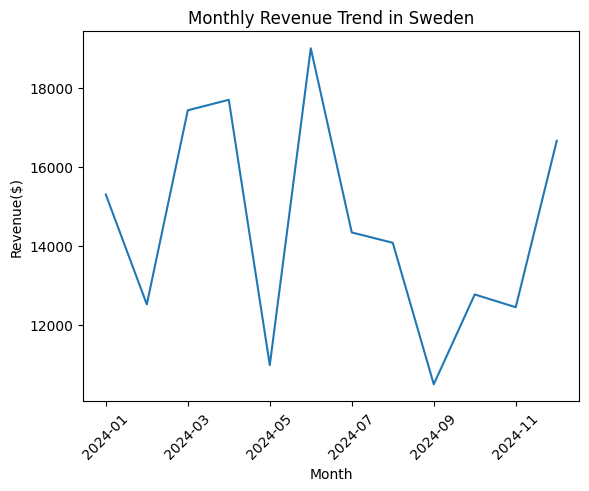

In [13]:
# Plot monthly revenue trend:
import matplotlib.pyplot as plt
monthly_revenue_sweden=df[df['country']=='Sweden'].groupby('month')['revenue'].sum()
monthly_revenue_sweden.plot(kind='line',title='Monthly Revenue Trend in Sweden',xlabel='Month',ylabel='Revenue($)')
plt.xticks(rotation=45)
plt.show()

In [14]:
# Customer segmentation:
customer_df=df.groupby(['customer_id','country']).agg(total_orders=('order_date','count'),total_revenue=('revenue','sum')).reset_index()
customer_df['avg_order_value']=(customer_df['total_revenue']/customer_df['total_orders'])

In [15]:
customer_df

,customer_id,country,total_orders,total_revenue,avg_order_value
0,100,Denmark,2,1082.02,541.010
1,100,Finland,2,1223.40,611.700
2,100,Norway,2,957.75,478.875
3,100,Sweden,2,1261.44,630.720
4,101,Denmark,2,322.87,161.435
...,...,...,...,...,...
545,297,Sweden,1,416.40,416.400
546,298,Denmark,1,160.28,160.280
547,298,Sweden,2,1152.74,576.370
548,299,Denmark,2,465.57,232.785


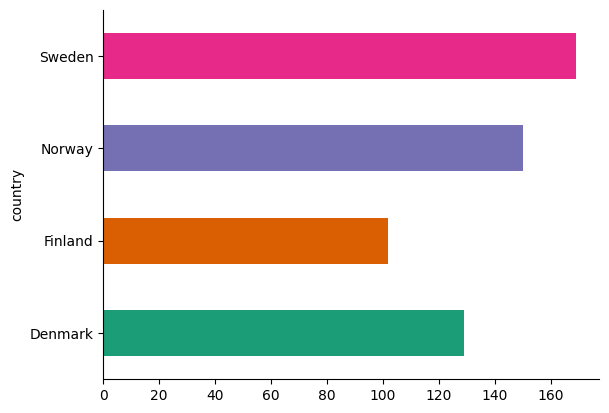

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
customer_df.groupby('country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

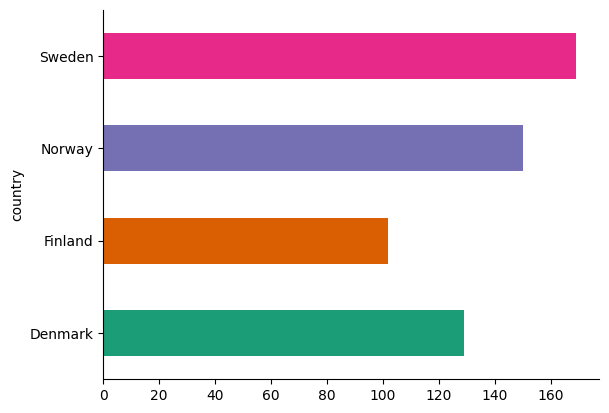

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns
customer_df.groupby('country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top','right',]].set_visible(False)

In [18]:
# Which country has highest average value:
highest_country=customer_df.groupby('country')['avg_order_value'].mean().sort_values(ascending=False)
print("Country with highest average value",highest_country)

Country with highest average value country
Sweden     475.023517
Denmark    468.457262
Norway     460.157948
Finland    411.207042
Name: avg_order_value, dtype: float64


In [19]:
# Predictive modeling:
threshold=customer_df['total_revenue'].quantile(0.75)
customer_df['high_value']=(customer_df['total_revenue']>=threshold).astype(int)
customer_df

,customer_id,country,total_orders,total_revenue,avg_order_value,high_value
0,100,Denmark,2,1082.02,541.010,0
1,100,Finland,2,1223.40,611.700,1
2,100,Norway,2,957.75,478.875,0
3,100,Sweden,2,1261.44,630.720,1
4,101,Denmark,2,322.87,161.435,0
...,...,...,...,...,...,...
545,297,Sweden,1,416.40,416.400,0
546,298,Denmark,1,160.28,160.280,0
547,298,Sweden,2,1152.74,576.370,0
548,299,Denmark,2,465.57,232.785,0


In [20]:
# Train test split & Logistic Regression:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_recall_fscore_support,roc_auc_score,roc_curve
X=customer_df[['total_orders','avg_order_value']]
y=customer_df['high_value']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LogisticRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
accuracy_score=accuracy_score(y_test,y_pred)
print('Accuracy_score',accuracy_score)
classfication_report=classification_report(y_test,y_pred)
print('Classification_report',classfication_report)
cm=confusion_matrix(y_test,y_pred)
print('Confusion_matrix',cm)
precision_recall_fscore_support=precision_recall_fscore_support(y_test,y_pred)
print('Precision_recall_fscore_support',precision_recall_fscore_support)
roc_auc_score=roc_auc_score(y_test,y_pred)
print('Roc_auc_score',roc_auc_score)
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
print('Roc_curve', (fpr, tpr, thresholds))

Accuracy_score 0.9090909090909091
Classification_report               precision    recall  f1-score   support

           0       0.93      0.95      0.94        82
           1       0.85      0.79      0.81        28

    accuracy                           0.91       110
   macro avg       0.89      0.87      0.88       110
weighted avg       0.91      0.91      0.91       110

Confusion_matrix [[78  4]
 [ 6 22]]
Precision_recall_fscore_support (array([0.92857143, 0.84615385]), array([0.95121951, 0.78571429]), array([0.93975904, 0.81481481]), array([82, 28]))
Roc_auc_score 0.8684668989547036
Roc_curve (array([0.        , 0.04878049, 1.        ]), array([0.        , 0.78571429, 1.        ]), array([inf,  1.,  0.]))


## Plotting the ROC Curve

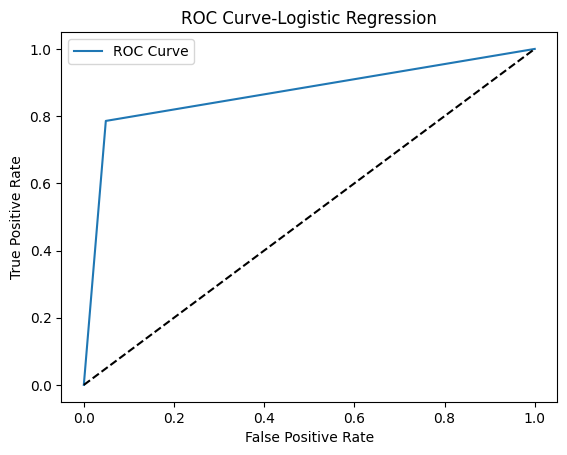

In [21]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,label='ROC Curve')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve-Logistic Regression')
plt.legend()
plt.show()

## Plot Confusion Matrix(Heatmap):

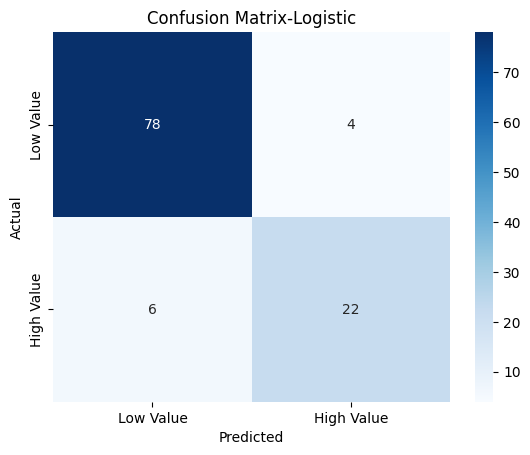

In [22]:
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Low Value','High Value'],yticklabels=['Low Value','High Value'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix-Logistic")
plt.show()

## Decision Boundary Plot

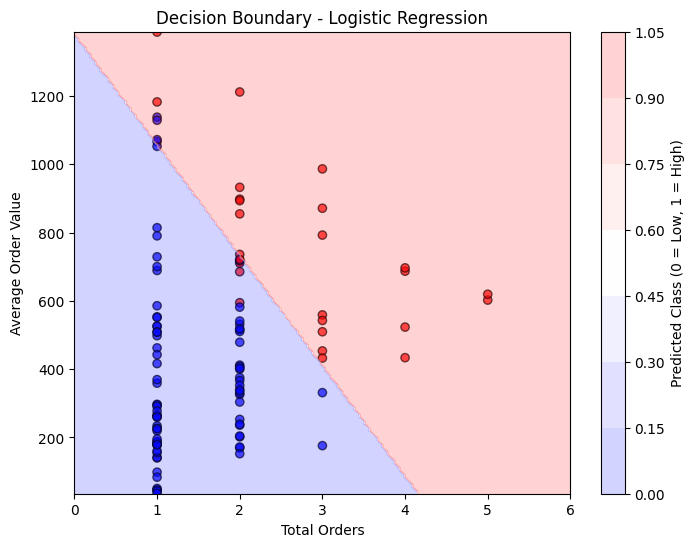

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Scatter plot of actual data
plt.figure(figsize=(8,6))
plt.scatter(X_test['total_orders'], X_test['avg_order_value'],
            c=y_test, cmap='bwr', edgecolor='k', alpha=0.7)
plt.xlabel("Total Orders")
plt.ylabel("Average Order Value")
plt.title("Decision Boundary - Logistic Regression")

# Create grid for decision boundary
x_min, x_max = X_test['total_orders'].min()-1, X_test['total_orders'].max()+1
y_min, y_max = X_test['avg_order_value'].min()-1, X_test['avg_order_value'].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict probabilities on grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.2, cmap='bwr')
plt.colorbar(label="Predicted Class (0 = Low, 1 = High)")
plt.show()
